In [1]:
pip install pandas jupyter

Note: you may need to restart the kernel to use updated packages.


���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


✅ 라벨 변환 완료!
  label      model_name
0     B  BLOOM (Medium)
1     C   BLOOM (Large)
2     A   BLOOM (Small)
3     A   BLOOM (Small)
4     F  GPT-3 (High-Q)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

c:\Users\SeungWoo\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SeungWoo\.cache\huggingface\hub\models--xlm-roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]


🤖 토크나이저 로드 완료: xlm-roberta-base
⏳ 텍스트 길이 계산 중...


100%|██████████| 5605/5605 [00:02<00:00, 2489.48it/s]


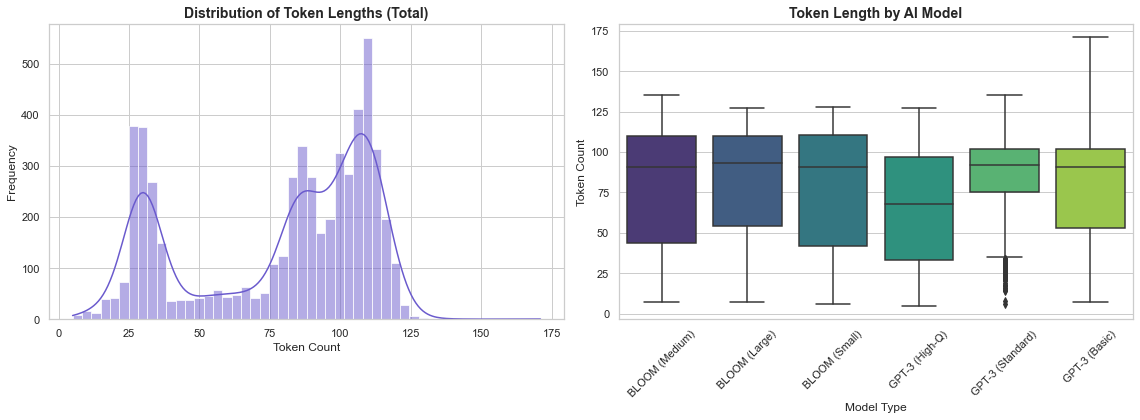


📊 모델별 평균 길이:
model_name
BLOOM (Large)       83.2
BLOOM (Medium)      81.8
BLOOM (Small)       82.7
GPT-3 (Basic)       78.9
GPT-3 (High-Q)      66.7
GPT-3 (Standard)    80.8
Name: token_length, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
from tqdm import tqdm

# ==========================================
# 1. 데이터 로드 및 라벨 해독 (수정된 부분)
# ==========================================
# 파일 경로는 본인 환경에 맞게 수정해주세요
file_path = "C:/Users/SeungWoo/Downloads/test.tsv" 
df = pd.read_csv(file_path, sep="\t")

# autextification.py에서 가져온 암호해독표
# 우리가 보기 편한 이름으로 매핑합니다.
label_map = {
    "A": "BLOOM (Small)",   # 1b7
    "B": "BLOOM (Medium)",  # 3b
    "C": "BLOOM (Large)",   # 7b1
    "D": "GPT-3 (Basic)",   # babbage
    "E": "GPT-3 (Standard)",# curie
    "F": "GPT-3 (High-Q)"   # davinci-003
}

# 'label' 컬럼의 A,B,C...를 실제 이름으로 바꿉니다.
# 만약 map에 없는 값(예: Human 등)이 있다면 그대로 둡니다.
df['model_name'] = df['label'].map(label_map).fillna(df['label'])

print("✅ 라벨 변환 완료!")
print(df[['label', 'model_name']].head()) # 변환 결과 확인

# ==========================================
# 2. 토크나이저 준비 (XLM-RoBERTa)
# ==========================================
# 영어+스페인어 데이터이므로 다국어 모델 사용
model_ckpt = "xlm-roberta-base" 
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
print(f"\n🤖 토크나이저 로드 완료: {model_ckpt}")

# ==========================================
# 3. 토큰 개수 계산
# ==========================================
token_counts = []
print("⏳ 텍스트 길이 계산 중...")

for text in tqdm(df['text']):
    if pd.isna(text):
        token_counts.append(0)
        continue
    # input_ids 길이 계산
    tokens = tokenizer(text, add_special_tokens=True)['input_ids']
    token_counts.append(len(tokens))

df['token_length'] = token_counts

# ==========================================
# 4. 시각화 (Model Name으로 그래프 그리기)
# ==========================================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 6)) # 그래프 크기 살짝 키움

# 4-1. 전체 길이 분포 (히스토그램)
plt.subplot(1, 2, 1)
sns.histplot(df['token_length'], bins=50, kde=True, color='slateblue')
plt.title('Distribution of Token Lengths (Total)', fontsize=14, fontweight='bold')
plt.xlabel('Token Count')
plt.ylabel('Frequency')

# 4-2. 모델별 길이 비교 (박스플롯) - 여기가 핵심!
plt.subplot(1, 2, 2)
# x축을 'model_name'으로 설정하여 보기 좋게 출력
sns.boxplot(x='model_name', y='token_length', data=df, palette="viridis")
plt.title('Token Length by AI Model', fontsize=14, fontweight='bold')
plt.xlabel('Model Type')
plt.ylabel('Token Count')
plt.xticks(rotation=45) # 이름이 기니까 살짝 기울임

plt.tight_layout()
plt.show()

# ==========================================
# 5. 통계 요약
# ==========================================
print("\n📊 모델별 평균 길이:")
print(df.groupby('model_name')['token_length'].mean().round(1))

🌐 서버에서 'https://dataset.raid-bench.xyz/train_none.csv'의 앞부분 500개 행만 로드 중...
✅ 로드 성공! (상위 500개 데이터)

🔍 텍스트 샘플 (길이 확인용):
['e5e058ce-be2b-459d-af36-32532aaba5ff'
 'f95b107b-d176-4af5-90f7-4d0bb20caf93'
 '856d8972-9e3d-4544-babc-0fe16f21e04d']

⏳ 토큰 개수 계산 중...


100%|██████████| 500/500 [00:00<00:00, 2619.08it/s]


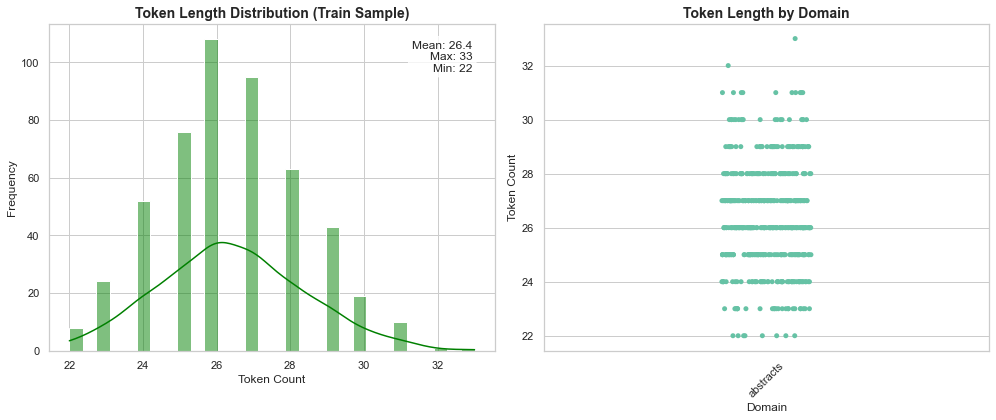


📊 상세 통계:
count    500.000000
mean      26.410000
std        1.959996
min       22.000000
25%       25.000000
50%       26.000000
75%       28.000000
max       33.000000
Name: token_length, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
from tqdm import tqdm
import io
import requests

# ==========================================
# 1. 대용량 파일의 앞부분만 가져오기 (Streaming)
# ==========================================
# RAID의 학습 데이터셋(Attack 없음) URL
url = "https://dataset.raid-bench.xyz/train_none.csv"

print(f"🌐 서버에서 '{url}'의 앞부분 500개 행만 로드 중...")

# pandas는 URL을 바로 읽을 수 있지만, nrows를 쓰면 필요한 만큼만 읽습니다.
# (네트워크 상황에 따라 몇 초 정도 걸릴 수 있습니다)
try:
    df = pd.read_csv(url, nrows=500)
    print(f"✅ 로드 성공! (상위 {len(df)}개 데이터)")
except Exception as e:
    print("❌ 다운로드 실패. URL을 확인하거나 인터넷 연결을 확인하세요.")
    print(e)

# 데이터 샘플 확인 (긴 글이 있는지 눈으로 먼저 확인)
print("\n🔍 텍스트 샘플 (길이 확인용):")
# 텍스트 컬럼명 확인 (보통 'text' 아니면 'content')
target_col = 'text' if 'text' in df.columns else df.columns[0]
print(df[target_col].head(3).values)

# ==========================================
# 2. 토큰 길이 계산
# ==========================================
# 긴 글 처리에 강한 roberta-base 사용
model_ckpt = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

token_counts = []
print("\n⏳ 토큰 개수 계산 중...")

for text in tqdm(df[target_col]):
    if pd.isna(text):
        token_counts.append(0)
        continue
    # truncation=False로 설정하여 512토큰이 넘어도 실제 길이를 잽니다.
    tokens = tokenizer(text, add_special_tokens=True, truncation=False)['input_ids']
    token_counts.append(len(tokens))

df['token_length'] = token_counts

# ==========================================
# 3. 시각화 (긴 글 분포 확인)
# ==========================================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

# 3-1. 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(df['token_length'], bins=30, kde=True, color='green')
plt.title('Token Length Distribution (Train Sample)', fontsize=14, fontweight='bold')
plt.xlabel('Token Count')
plt.ylabel('Frequency')

# 통계 텍스트 추가
stats = df['token_length'].describe()
stats_text = f"Mean: {stats['mean']:.1f}\nMax: {stats['max']:.0f}\nMin: {stats['min']:.0f}"
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3-2. 도메인별 길이 (도메인 정보가 있다면)
if 'domain' in df.columns:
    plt.subplot(1, 2, 2)
    # 데이터가 적으므로(500개) boxplot 대신 stripplot이나 swarmplot이 보기 좋을 수 있음
    sns.stripplot(x='domain', y='token_length', data=df, palette="Set2", jitter=True)
    plt.title('Token Length by Domain', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.xlabel('Domain')
    plt.ylabel('Token Count')
else:
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, "No Domain Info", ha='center')

plt.tight_layout()
plt.show()

print("\n📊 상세 통계:")
print(stats)